In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
epidem = pd.read_csv('Islandwide-Fever-and-Respiratory-Symptoms.csv.csv')

In [5]:
epidem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 4 columns):
Year                              1119 non-null int64
Age Range                         1119 non-null object
Epidemiological Week              1119 non-null int64
Fever and Respiratory Symptoms    1119 non-null int64
dtypes: int64(3), object(1)
memory usage: 35.0+ KB


In [6]:
epidem.describe()

,Year,Epidemiological Week,Fever and Respiratory Symptoms
count,1119.000000,1119.000000,1119.000000
mean,2011.276139,25.761394,440.869526
std,2.350289,15.126458,366.038221
min,2008.000000,1.000000,18.000000
25%,2009.000000,12.000000,81.000000
50%,2011.000000,26.000000,436.000000
75%,2013.000000,39.000000,636.500000
max,2016.000000,52.000000,2896.000000


In [7]:
epidem.head()

,Year,Age Range,Epidemiological Week,Fever and Respiratory Symptoms
0,2008,5 and younger,1,453
1,2008,5 and younger,2,442
2,2008,5 and younger,3,552
3,2008,5 and younger,4,688
4,2008,5 and younger,5,649


In [8]:
epidem['Age Range'].value_counts()

5 and younger    373
60 and older     373
5-59             373
Name: Age Range, dtype: int64

In [20]:
epidem['5AndYounger'] = epidem['Age Range'].apply(lambda x: 1 if x == '5 and younger' else 0)

In [22]:
epidem['60andOlder'] = epidem['Age Range'].apply(lambda x: 1 if x == '60 and older' else 0)

In [23]:
epidem['Fiveto5nine'] = epidem['Age Range'].apply(lambda x: 1 if x == '5-59' else 0)

In [9]:
epimat = epidem.pivot_table(index='Epidemiological Week',columns='Year', values='Fever and Respiratory Symptoms')

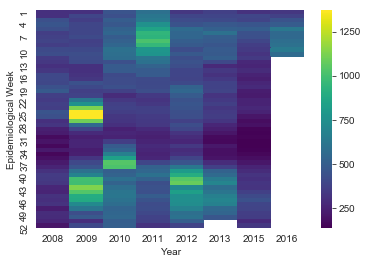

In [18]:
#THe dataset is missing 
sns.heatmap(epimat,cmap='viridis')

In [24]:
cormat = epidem.corr()
cormat

,Year,Epidemiological Week,Fever and Respiratory Symptoms,5AndYounger,60andOlder,Fiveto5nine
Year,1.000000e+00,-8.690726e-02,-0.063684,-2.404594e-16,8.528963e-17,-8.242276e-18
Epidemiological Week,-8.690726e-02,1.000000e+00,0.014864,1.904274e-17,-9.577049e-18,-5.568052e-19
Fever and Respiratory Symptoms,-6.368374e-02,1.486398e-02,1.000000,3.295639e-01,-7.222731e-01,3.927092e-01
5AndYounger,-2.404594e-16,1.904274e-17,0.329564,1.000000e+00,-5.000000e-01,-5.000000e-01
60andOlder,8.528963e-17,-9.577049e-18,-0.722273,-5.000000e-01,1.000000e+00,-5.000000e-01
Fiveto5nine,-8.242276e-18,-5.568052e-19,0.392709,-5.000000e-01,-5.000000e-01,1.000000e+00


In [26]:
Kids = epidem[epidem['5AndYounger']==1]

In [27]:
type(Kids)

pandas.core.frame.DataFrame

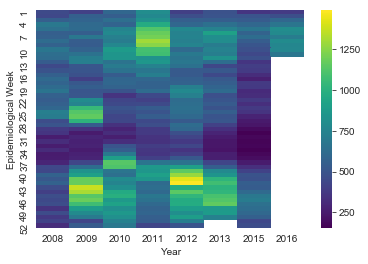

In [28]:
kidmat = Kids.pivot_table(index='Epidemiological Week',columns='Year', values='Fever and Respiratory Symptoms')
sns.heatmap(kidmat,cmap='viridis')

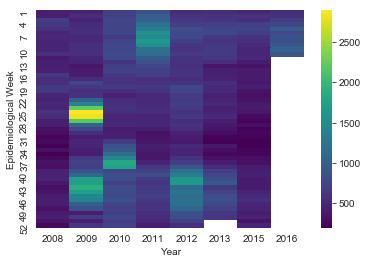

In [29]:
NotKids = epidem[epidem['Fiveto5nine']==1]
Notmat = NotKids.pivot_table(index='Epidemiological Week',columns='Year', values='Fever and Respiratory Symptoms')
sns.heatmap(Notmat,cmap='viridis')

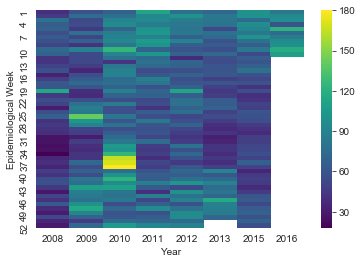

In [30]:
Old = epidem[epidem['60andOlder']==1]
Oldmat = Old.pivot_table(index='Epidemiological Week',columns='Year', values='Fever and Respiratory Symptoms')
sns.heatmap(Oldmat,cmap='viridis')

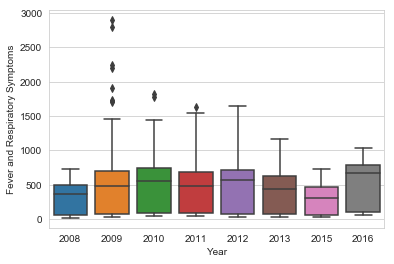

In [33]:
sns.boxplot(x='Year',y='Fever and Respiratory Symptoms',data=epidem)

In [ ]:
g = sns.FacetGrid(tips, col="time", row="smoker")